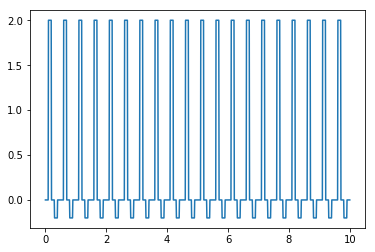

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import voltage_sweeps as vs
import voltage_discrete as vd 
import model
import utils

#
# setup the experiment
#

# here we have the self adjusting definitions for sweeps 
# we can vary number of timeseps (resolution)
# the range 
# and the vale range 

timesteps=1000
time=.5
v_range=.5 # full range (from - to +, e.g. -1 -> 1 : range is 2)
time_domain=np.linspace(0,time,timesteps,dtype=np.float64)

# scan rate for unidirectional sweeps, multiply by 2 for biderectional
scan_rate=v_range/time

vls=utils.partial(vs.voltage_lin_sweep,-v_range/2.,scan_rate)
vlsbd=utils.partial(vs.voltage_bidirectional_sweep,-v_range/2.,2*scan_rate,time/2.)

vpulse_double_pos_neg_discrete=utils.partial(utils.interpolator,vd.double_pulse_t,vd.double_pulse_pos_neg_v)    



#alias
vf=vlsbd
vf=vpulse_double_pos_neg_discrete

vf=utils.partial(utils.make_periodic,vpulse_double_pos_neg_discrete,0.5)
time_domain_periodic=np.linspace(0,10,timesteps,dtype=np.float64)
time_domain=time_domain_periodic

v_array=np.array([vf(t) for t in time_domain])
plt.plot(time_domain,v_array)

tm=model.TransistorModel(Cion=7.2e-6,Rion=6.7e4)
#(i,v,q)=tm.apply_1T_model(0,time_domain,vf)
(i,v,q)=tm.apply_2T_model(0,-v_range/2.,time_domain,vf)


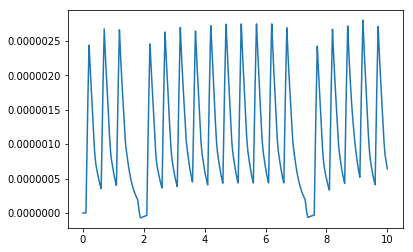

In [16]:
plt.plot(time_domain,q)

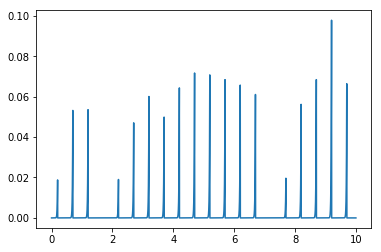

In [17]:
plt.plot(time_domain,i)

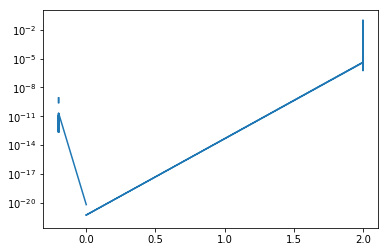

In [18]:
plt.semilogy(v_array,abs(i))

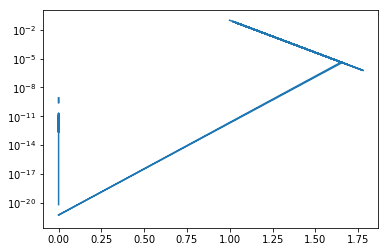

In [19]:
plt.semilogy(v,abs(i))